In [1]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'dermatology'
test_on_all_folds = True
test_all_ds = False

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 200}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 16},
  'weighted_triplet_loss': True,
  'lr': 0.0005,
  'batch_size': 16,
  'gamma': 0.9,
  'epochs': 100}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 150}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.00001,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 70}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0003,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': {'un

In [8]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
        } 
    return classifiers

dermatology


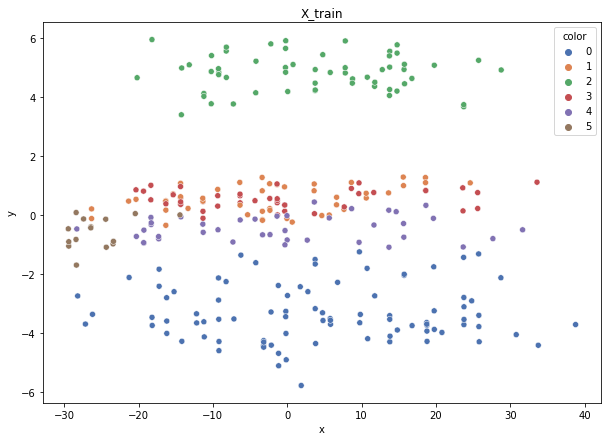

Class cardinalities: Counter({0: 90, 2: 58, 1: 48, 4: 41, 3: 39, 5: 16})
Weights: {1: 0.1288257963857323, 0: 0.0687070914057239, 2: 0.10661445218129569, 4: 0.15082044454915, 3: 0.1585548263209013, 5: 0.38647738915719687}


100%|██████████| 74/74 [00:00<00:00, 2999.06it/s]


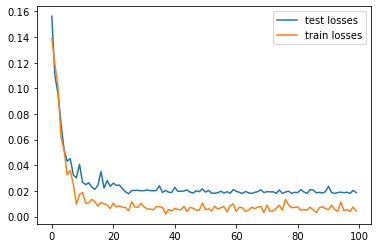

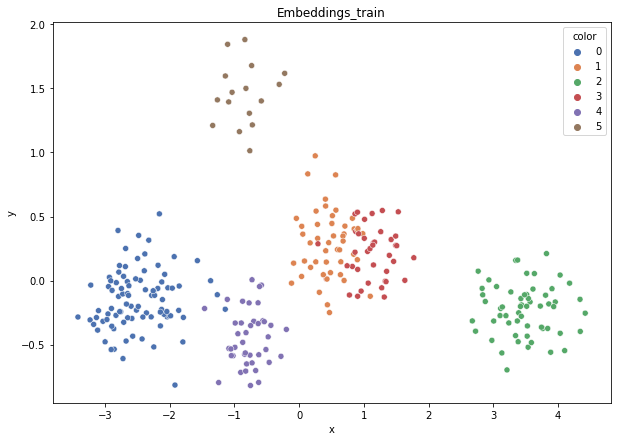

DT-f1-new-features: 0.865
DT-f1-old+new-features: 0.901
DT-f1-old-features: 0.914
DT-gmean-new-features: 0.855
DT-gmean-old+new-features: 0.891
DT-gmean-old-features: 0.911
KNN-f1-new-features: 0.89
KNN-f1-old+new-features: 0.899
KNN-f1-old-features: 0.871
KNN-gmean-new-features: 0.871
KNN-gmean-old+new-features: 0.892
KNN-gmean-old-features: 0.857
RF24-f1-new-features: 0.92
RF24-f1-old+new-features: 0.949
RF24-f1-old-features: 0.959
RF24-gmean-new-features: 0.908
RF24-gmean-old+new-features: 0.943
RF24-gmean-old-features: 0.957


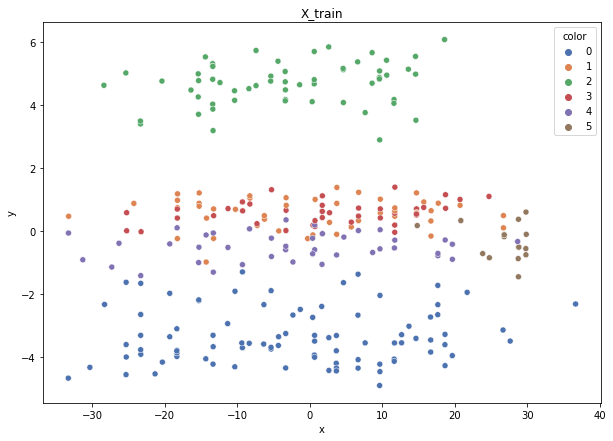

Class cardinalities: Counter({0: 89, 2: 58, 1: 49, 4: 41, 3: 40, 5: 16})
Weights: {1: 0.1269355878601628, 2: 0.10723868629565478, 0: 0.06988588545110087, 4: 0.1517035074426336, 3: 0.15549609512869944, 5: 0.3887402378217486}


100%|██████████| 73/73 [00:00<00:00, 2868.61it/s]


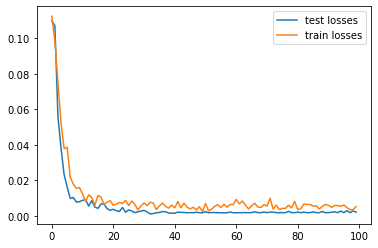

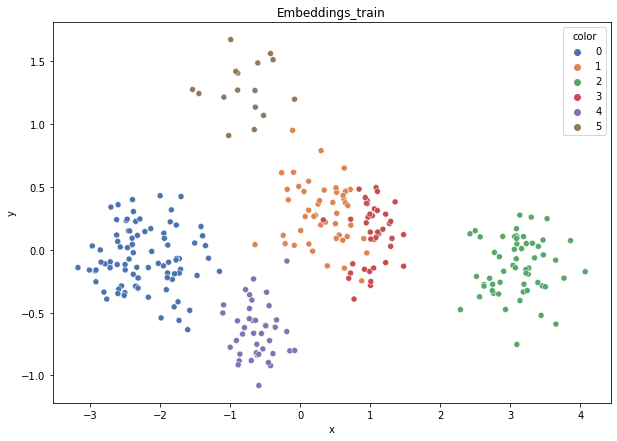

DT-f1-new-features: 0.908
DT-f1-old+new-features: 0.937
DT-f1-old-features: 0.955
DT-gmean-new-features: 0.9
DT-gmean-old+new-features: 0.934
DT-gmean-old-features: 0.955
KNN-f1-new-features: 0.954
KNN-f1-old+new-features: 0.876
KNN-f1-old-features: 0.86
KNN-gmean-new-features: 0.955
KNN-gmean-old+new-features: 0.863
KNN-gmean-old-features: 0.841
RF24-f1-new-features: 0.908
RF24-f1-old+new-features: 0.952
RF24-f1-old-features: 0.984
RF24-gmean-new-features: 0.9
RF24-gmean-old+new-features: 0.951
RF24-gmean-old-features: 0.986


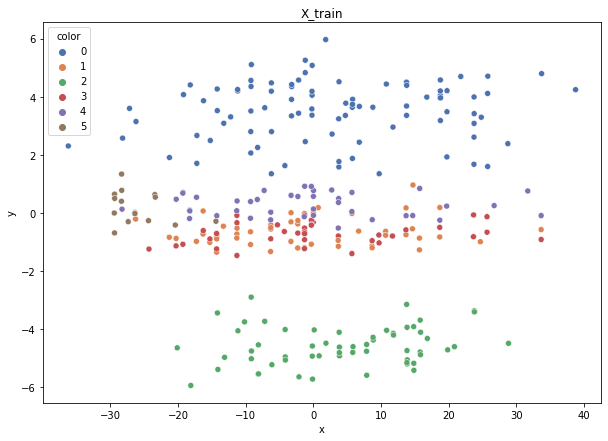

Class cardinalities: Counter({0: 89, 2: 58, 1: 49, 4: 42, 3: 39, 5: 16})
Weights: {0: 0.06985968170695418, 2: 0.10719847710205038, 4: 0.14803599218854577, 3: 0.15942337620304928, 1: 0.1268879933044678, 5: 0.38859447949493264}


100%|██████████| 73/73 [00:00<00:00, 2899.17it/s]


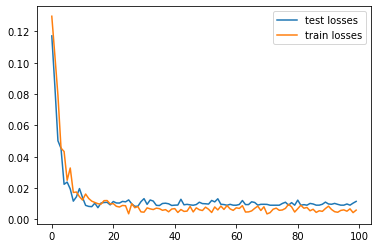

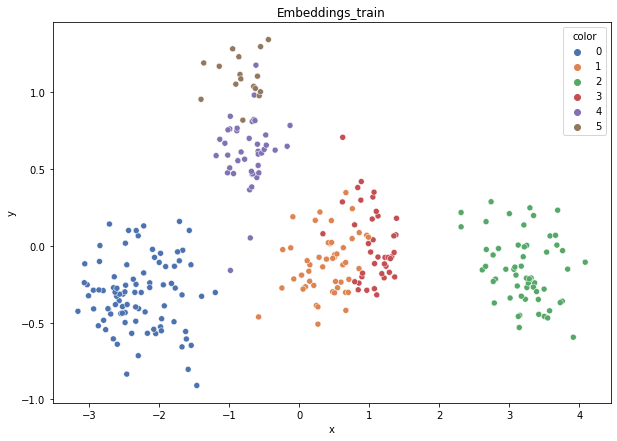

DT-f1-new-features: 0.865
DT-f1-old+new-features: 0.943
DT-f1-old-features: 0.945
DT-gmean-new-features: 0.85
DT-gmean-old+new-features: 0.953
DT-gmean-old-features: 0.953
KNN-f1-new-features: 0.906
KNN-f1-old+new-features: 0.902
KNN-f1-old-features: 0.898
KNN-gmean-new-features: 0.889
KNN-gmean-old+new-features: 0.891
KNN-gmean-old-features: 0.878
RF24-f1-new-features: 0.917
RF24-f1-old+new-features: 0.926
RF24-f1-old-features: 0.909
RF24-gmean-new-features: 0.921
RF24-gmean-old+new-features: 0.922
RF24-gmean-old-features: 0.905


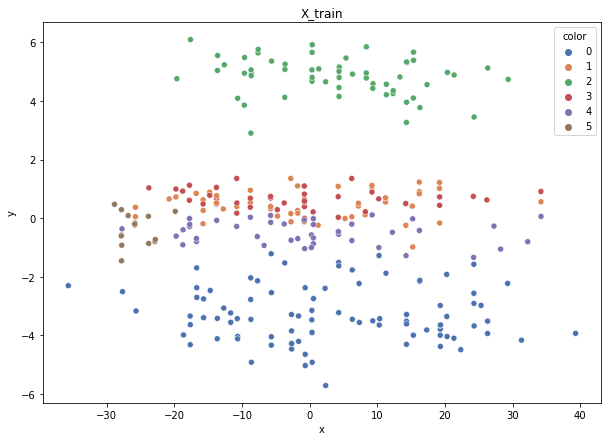

Class cardinalities: Counter({0: 90, 2: 57, 1: 49, 4: 42, 3: 39, 5: 16})
Weights: {1: 0.12674800566460384, 0: 0.06900724752850654, 2: 0.10895881188711559, 4: 0.14787267327537115, 3: 0.15924749429655355, 5: 0.3881657673478493}


100%|██████████| 73/73 [00:00<00:00, 2964.20it/s]


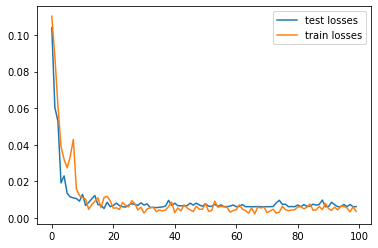

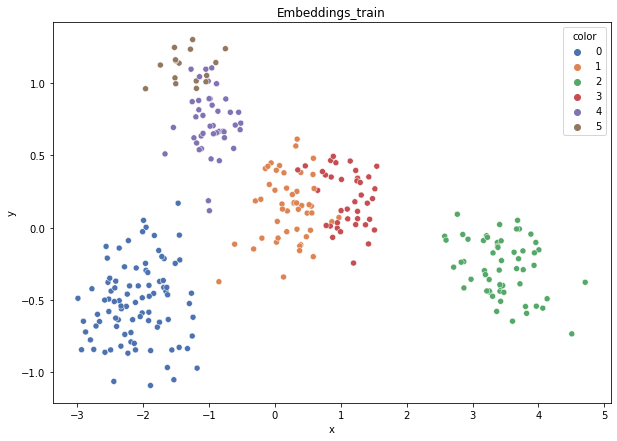

DT-f1-new-features: 0.848
DT-f1-old+new-features: 0.856
DT-f1-old-features: 0.946
DT-gmean-new-features: 0.812
DT-gmean-old+new-features: 0.818
DT-gmean-old-features: 0.945
KNN-f1-new-features: 0.891
KNN-f1-old+new-features: 0.871
KNN-f1-old-features: 0.871
KNN-gmean-new-features: 0.881
KNN-gmean-old+new-features: 0.865
KNN-gmean-old-features: 0.865
RF24-f1-new-features: 0.909
RF24-f1-old+new-features: 0.924
RF24-f1-old-features: 0.969
RF24-gmean-new-features: 0.901
RF24-gmean-old+new-features: 0.918
RF24-gmean-old-features: 0.963


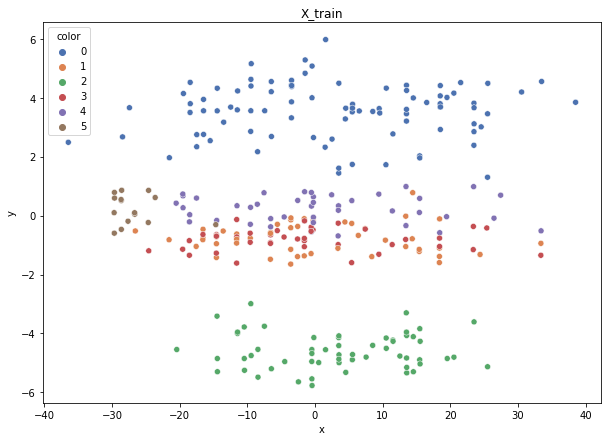

Class cardinalities: Counter({0: 90, 2: 57, 1: 49, 4: 42, 3: 39, 5: 16})
Weights: {1: 0.12674800566460384, 0: 0.06900724752850654, 2: 0.10895881188711559, 3: 0.15924749429655355, 4: 0.14787267327537115, 5: 0.3881657673478493}


100%|██████████| 73/73 [00:00<00:00, 2996.90it/s]


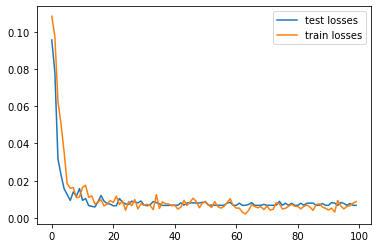

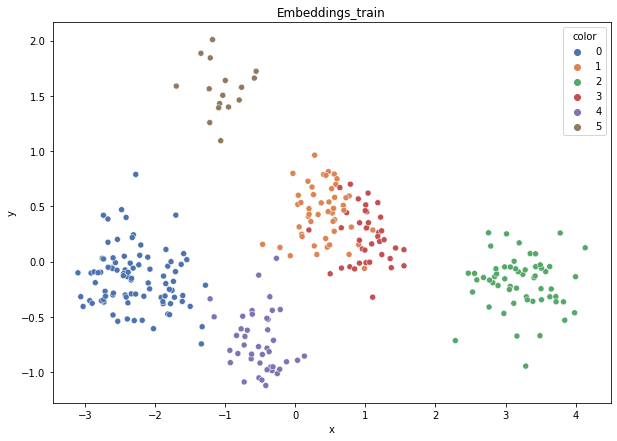

DT-f1-new-features: 0.82
DT-f1-old+new-features: 0.883
DT-f1-old-features: 0.989
DT-gmean-new-features: 0.755
DT-gmean-old+new-features: 0.794
DT-gmean-old-features: 0.992
KNN-f1-new-features: 0.89
KNN-f1-old+new-features: 0.902
KNN-f1-old-features: 0.873
KNN-gmean-new-features: 0.884
KNN-gmean-old+new-features: 0.911
KNN-gmean-old-features: 0.881
RF24-f1-new-features: 0.868
RF24-f1-old+new-features: 0.954
RF24-f1-old-features: 1.0
RF24-gmean-new-features: 0.843
RF24-gmean-old+new-features: 0.939
RF24-gmean-old-features: 1.0


In [9]:
result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [10]:
results_df = pd.DataFrame.from_dict(result_dict)

In [11]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,KNN-f1-old+new-features,KNN-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features
0,dermatology,0.9642,0.962295,0.949703,0.951222,0.874814,0.864271,0.941047,0.934701,0.904097,0.877909,0.890193,0.884292,0.9043,0.89432,0.861199,0.834191,0.906156,0.895967


In [12]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,dermatology,0.964200,0.941047,0.904300


In [13]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,dermatology,0.962295,0.934701,0.894320


In [14]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,dermatology,0.949703,0.904097,0.861199


In [15]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,dermatology,0.951222,0.877909,0.834191


In [16]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,dermatology,0.874814,0.890193,0.906156


In [17]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,dermatology,0.864271,0.884292,0.895967
